In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow-datasets

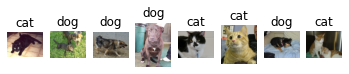

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised =True)

i=0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
  ax[i].axis('off')
  ax[i].set_title(classNames[label])
  ax[i].imshow(image)
  i += 1

plt.show()

In [ ]:
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
def preprocess(img, label):
  return tf.image.resize(img, [HEIGHT, WIDTH])/255, label

HEIGHT = 200
WIDTH = 200
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised =True)

trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

model = keras.Sequential([
      keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(32, (3,3), activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(64, (3,3), activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(512, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

trainHistory = model.fit(trainDataset, epochs=4, validation_data=testDataset)


Epoch 1/4
509/509 [==============================] - 694s 1s/step - loss: 0.3427 - accuracy: 0.8502 - val_loss: 0.4670 - val_accuracy: 0.7882
Epoch 2/4
509/509 [==============================] - 695s 1s/step - loss: 0.2286 - accuracy: 0.9066 - val_loss: 0.6274 - val_accuracy: 0.7525
Epoch 3/4
509/509 [==============================] - 696s 1s/step - loss: 0.1636 - accuracy: 0.9363 - val_loss: 0.7592 - val_accuracy: 0.7545
Epoch 4/4
509/509 [==============================] - 700s 1s/step - loss: 0.1308 - accuracy: 0.9503 - val_loss: 0.8113 - val_accuracy: 0.7725


In [ ]:
(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

model.save('Project1')

219/219 [==============================] - 82s 373ms/step - loss: 0.8113 - accuracy: 0.7725
0.8113378286361694
0.7724602222442627
INFO:tensorflow:Assets written to: Project1/assets


INFO:tensorflow:Assets written to: Project1/assets


In [ ]:
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf


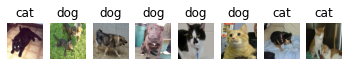

In [ ]:
def preprocess(img, label):
  return tf.image.resize(img, [HEIGHT, WIDTH])/255, tf.cast(label, tf.float32)


HEIGHT = 200
WIDTH = 200
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised =True)

testDataset = testDataset.map(preprocess).batch(1)
model = keras.models.load_model('Project1')

predictions = model.predict(testDataset.take(8))

i = 0
fig, ax = plt.subplots(1,8)
for image, _ in testDataset.take(8):
  predictedLabel = int(predictions[i] >= 0.5)

  ax[i].axis('off')
  ax[i].set_title(classNames[predictedLabel])
  ax[i].imshow(image[0])
  i += 1

plt.show()
